<a href="https://colab.research.google.com/github/prathyusha0310/super-trend-technical-indicator/blob/main/Super_Trend_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import scipy.stats as stats
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, Image
import plotly.graph_objects as go
!pip install quandl


In [ ]:
import quandl as qdl
api=qdl.ApiConfig.api_key='RGoU8urdFFD_fB7QjV51'

In [ ]:
start='2010-01-01'
end='2018-01-01'  
fb=qdl.get('WIKI/FB',start_date=start,end_date=end)
original_copy = fb

In [ ]:
fb.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


In [ ]:
fb.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=1413, freq=None)

In [ ]:
fb.tail()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-22,177.14,177.5300,176.23,177.20,8462491.0,0.0,1.0,177.14,177.5300,176.23,177.20,8462491.0
2017-12-26,176.63,177.0000,174.67,175.99,8726829.0,0.0,1.0,176.63,177.0000,174.67,175.99,8726829.0
2017-12-27,176.55,178.4400,176.26,177.62,9296258.0,0.0,1.0,176.55,178.4400,176.26,177.62,9296258.0
2017-12-28,177.95,178.9367,177.68,177.92,11008996.0,0.0,1.0,177.95,178.9367,177.68,177.92,11008996.0
2017-12-29,178.00,178.8500,176.46,176.46,10028758.0,0.0,1.0,178.00,178.8500,176.46,176.46,10028758.0


In [ ]:
fig=go.Figure(data=[go.Candlestick(x=fb.index,open=fb['Open'],close=fb['Close'],low=fb['Low'],high=fb['High'])])
fig.show()

In [ ]:
fb.isna().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

In [ ]:
def ST(df,f,n):
  df['H-L']=abs(df['High']-df['Low'])
  df['H-PC']=abs(df['High']-df['Close'].shift(1))# shift is added to subtract the previous close value.
  df['L-PC']=abs(df['Low']-df['Close'].shift(1))
  df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1)#to find true range
  df['ATR']=np.nan #initiate with nan values
#calculate ATR(average true range)
  df['ATR']=df['TR'].rolling(n-1).mean()# average true range for period n by computing rolling mean.
  for i in range(n,len(df)):
    df['ATR'][i]=(df['ATR'][i-1]*(n-1)+ df['TR'][i])/n

    #Calculation of SuperTrend values 
  df['Upper Basic']=(df['High']+df['Low'])/2+(f*df['ATR'])
  df['Lower Basic']=(df['High']+df['Low'])/2-(f*df['ATR']) #formula
  df['Upper Band']=df['Upper Basic']
  df['Lower Band']=df['Lower Basic']
  for i in range(n,len(df)):
    if df['Close'][i-1]<=df['Upper Band'][i-1]:
      df['Upper Band'][i]=min(df['Upper Basic'][i],df['Upper Band'][i-1])
    else:
      df['Upper Band'][i]=df['Upper Basic'][i]    
  for i in range(n,len(df)):
    if df['Close'][i-1]>=df['Lower Band'][i-1]:
      df['Lower Band'][i]=max(df['Lower Basic'][i],df['Lower Band'][i-1])
    else:
      df['Lower Band'][i]=df['Lower Basic'][i]
      df['ST']=np.nan
  for i in df['ST']:
    if df['Close'][n-1]<=df['Upper Band'][n-1]:
      df['ST'][n-1]=df['Upper Band'][n-1]
    elif df['Close'][n-1]>df['Upper Band'][i]:
      df['ST'][n-1]=df['Lower Band'][n-1]
  for i in range(n,len(df)):
    if df['ST'][i-1]==df['Upper Band'][i-1] and df['Close'][i]<=df['Upper Band'][i]:
      df['ST'][i]=df['Upper Band'][i]
    elif  df['ST'][i-1]==df['Upper Band'][i-1] and df['Close'][i]>=df['Upper Band'][i]:
      df['ST'][i]=df['Lower Band'][i]
    elif df['ST'][i-1]==df['Lower Band'][i-1] and df['Close'][i]>=df['Lower Band'][i]:
      df['ST'][i]=df['Lower Band'][i]
    elif df['ST'][i-1]==df['Lower Band'][i-1] and df['Close'][i]<=df['Lower Band'][i]:
      df['ST'][i]=df['Upper Band'][i]
  return df


In [ ]:
ST(fb,3,7)
fb.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,H-L,H-PC,L-PC,TR,ATR,Upper Basic,Lower Basic,Upper Band,Lower Band,ST
Date,,,,,,,,,,,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0,7.00,NaN,NaN,7.0000,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0,3.66,1.5718,5.2318,5.2318,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0,2.65,0.4400,3.0900,3.0900,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0,1.14,1.5000,0.3600,1.5000,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0,1.44,1.2100,0.2300,1.4400,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fb.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,H-L,H-PC,L-PC,TR,ATR,Upper Basic,Lower Basic,Upper Band,Lower Band,ST
Date,,,,,,,,,,,,,,,,,,,,,,
2017-12-22,177.14,177.5300,176.23,177.20,8462491.0,0.0,1.0,177.14,177.5300,176.23,177.20,8462491.0,1.3000,0.0800,1.22,1.3000,2.441621,184.204864,169.555136,184.204864,171.825434,184.204864
2017-12-26,176.63,177.0000,174.67,175.99,8726829.0,0.0,1.0,176.63,177.0000,174.67,175.99,8726829.0,2.3300,0.2000,2.53,2.5300,2.454247,183.197740,168.472260,183.197740,171.825434,183.197740
2017-12-27,176.55,178.4400,176.26,177.62,9296258.0,0.0,1.0,176.55,178.4400,176.26,177.62,9296258.0,2.1800,2.4500,0.27,2.4500,2.453640,184.710920,169.989080,183.197740,171.825434,183.197740
2017-12-28,177.95,178.9367,177.68,177.92,11008996.0,0.0,1.0,177.95,178.9367,177.68,177.92,11008996.0,1.2567,1.3167,0.06,1.3167,2.291220,185.182010,171.434690,183.197740,171.825434,183.197740
2017-12-29,178.00,178.8500,176.46,176.46,10028758.0,0.0,1.0,178.00,178.8500,176.46,176.46,10028758.0,2.3900,0.9300,1.46,2.3900,2.305331,184.570994,170.739006,183.197740,171.825434,183.197740


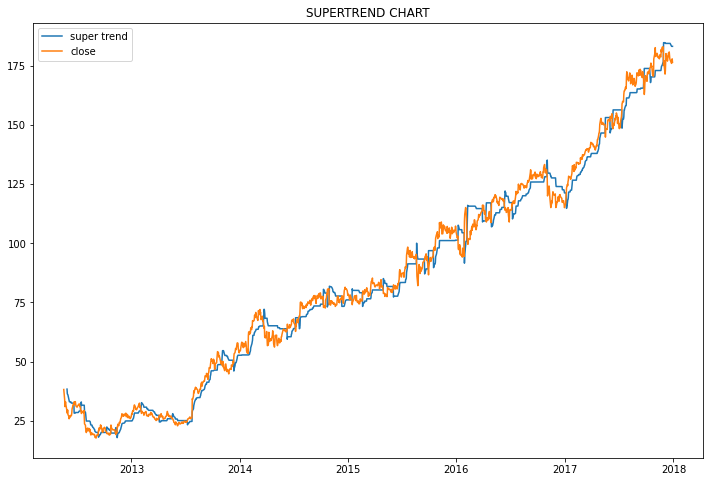

In [ ]:
plt.figure(figsize=(12,8))
plt.title("SUPERTREND CHART")
plt.plot(fb['ST'],label="super trend")
plt.plot(fb['Close'],label="close")
plt.legend()